# Importing pandas, matplotlib and uploading of the file

In [ ]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations

# Setting display options for pandas DataFrames
pd.set_option('display.max_columns', None)  # Display all columns when printing DataFrames
pd.set_option('display.max_rows', 100)  # Display up to 100 rows when printing DataFrames

# Reading data from a CSV file into a pandas DataFrame
data = pd.read_csv('/content/sdgs_subnational_ken.csv')  # Load data from the specified file path

# Displaying the first few rows of the DataFrame to preview the data
data.head()  # Show the top rows of the 'data' DataFrame

,ISO3,Location,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,IndicatorId,IndicatorOrder,IndicatorType,CharacteristicId,CharacteristicOrder,CharacteristicCategory,CharacteristicLabel,ByVariableId,ByVariableLabel,IsTotal,IsPreferred,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank
0,KEN,Coast,1527624,Age specific fertility rate: 10-14,3.0,0,KE,Kenya,1989,KE1989DHS,FE_FRTR_W_A10,11763005,I,416003,1416010,Region,Coast,0,NaN,0,1,FEFRTRWA10,KEDHS1989416003,1989,DHS,NaN,NaN,NaN,NaN,1.0
1,KEN,Eastern,1546182,Age specific fertility rate: 10-14,2.0,0,KE,Kenya,1989,KE1989DHS,FE_FRTR_W_A10,11763005,I,416004,1416030,Region,Eastern,0,NaN,0,1,FEFRTRWA10,KEDHS1989416004,1989,DHS,NaN,NaN,NaN,NaN,1.0
2,KEN,Central,1533562,Age specific fertility rate: 10-14,1.0,0,KE,Kenya,1989,KE1989DHS,FE_FRTR_W_A10,11763005,I,416002,1416040,Region,Central,0,NaN,0,1,FEFRTRWA10,KEDHS1989416002,1989,DHS,NaN,NaN,NaN,NaN,1.0
3,KEN,Rift Valley,1546195,Age specific fertility rate: 10-14,2.0,0,KE,Kenya,1989,KE1989DHS,FE_FRTR_W_A10,11763005,I,416006,1416050,Region,Rift Valley,0,NaN,0,1,FEFRTRWA10,KEDHS1989416006,1989,DHS,NaN,NaN,NaN,NaN,1.0
4,KEN,Western,1546154,Age specific fertility rate: 10-14,0.0,0,KE,Kenya,1989,KE1989DHS,FE_FRTR_W_A10,11763005,I,416007,1416070,Region,Western,0,NaN,0,1,FEFRTRWA10,KEDHS1989416007,1989,DHS,NaN,NaN,NaN,NaN,1.0


# Data cleaning

In [ ]:
#drop first row
df=data.iloc[1:]


#  drop all the columns except:
# 1. Location
# 2. Value
# 3. Indicator
# 4. LevelRank
# 5. SurveyYear
to_drop=[ column for column in df.columns if 'Id' in column or'ID'in column or 'ISO3' in column or 'Order' in column
          or 'DHS_CountryCode' in column or 'By' in column or 'Is' in column or 'Type' in column or
          'CountryName' in column or 'CountryName'in column or 'Characteristic' in column or
          'SDRID' in column or 'Label' in column or 'Denominator'in column or 'Precision'
           in column or 'Variable' in column or 'CILow'in column or 'CIHigh' in column]
df=df.drop(to_drop,axis=1)

to_drop=df.loc[:,df.nunique()==1].columns
df=df.drop(to_drop,axis=1)


#column type conversion from object to float
df['Value']=df['Value'].astype(float)

df.head()

,Location,Indicator,Value,SurveyYear,LevelRank
1,Eastern,Age specific fertility rate: 10-14,2.0,1989,1.0
2,Central,Age specific fertility rate: 10-14,1.0,1989,1.0
3,Rift Valley,Age specific fertility rate: 10-14,2.0,1989,1.0
4,Western,Age specific fertility rate: 10-14,0.0,1989,1.0
5,Nyanza,Age specific fertility rate: 10-14,3.0,1989,1.0


# Analytical Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 1 to 3699
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    3699 non-null   object 
 1   Indicator   3699 non-null   object 
 2   Value       3699 non-null   float64
 3   SurveyYear  3699 non-null   int64  
 4   LevelRank   3420 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 144.6+ KB


In [ ]:
#Identifying the number of unique values in each column of the DataFrame.
df.nunique()


,0
Location,59
Indicator,35
Value,983
SurveyYear,9
LevelRank,2


In [ ]:
# Converting to Datetime
df['SurveyYear'] = pd.to_datetime(df['SurveyYear'], format='%Y').dt.year
df['SurveyYear'].unique().T  # Extracting the Year

array([1989, 1993, 1998, 2003, 2008, 2014, 2015, 2020, 2022], dtype=int32)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,3699.0,41.675399,34.031041,0.0,12.15,33.6,69.65,225.0
SurveyYear,3699.0,2016.111111,8.486227,1989.0,2014.00,2022.0,2022.00,2022.0
LevelRank,3420.0,1.156725,0.363595,1.0,1.00,1.0,1.00,2.0


Descriptive statistical analysis for Idicator column

In [ ]:
#navigation through all unique values in the Indicator
for indicators in df['Indicator'].unique():
  print(indicators, ': ')
  ind_df=(df[df['Indicator']==indicators]['Value'].describe())

  print(ind_df)

Age specific fertility rate: 10-14 : 
count    148.000000
mean       2.277027
std        3.384279
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       15.000000
Name: Value, dtype: float64
Age specific fertility rate: 15-19 : 
count    156.000000
mean      95.333333
std       36.784347
min       21.000000
25%       70.750000
50%       87.000000
75%      118.500000
max      225.000000
Name: Value, dtype: float64
Neonatal mortality rate : 
count    146.000000
mean      24.582192
std        8.719188
min        4.000000
25%       19.000000
50%       24.000000
75%       28.000000
max       62.000000
Name: Value, dtype: float64
Under-five mortality rate : 
count    146.000000
mean      60.150685
std       34.906840
min       15.000000
25%       39.250000
50%       50.500000
75%       67.750000
max      206.000000
Name: Value, dtype: float64
Assistance during delivery from a skilled provider : 
count    377.000000
mean      64.642706
std       23.164454
mi

# Example explanation for one of the the indicators to be analyzed
Indicator: Population using open defecation

This indicator likely represents the percentage of the population in a specific area or region that practices open defecation.

Statistics:

1. **count 103.000000:** This means there are 103 data points (observations) available for this indicator. These could be from different regions or time periods within the dataset.
2.** mean 13.724272:** The average percentage of the population practicing open defecation across the 103 observations is approximately 13.72%.
3. **std 16.795765:** The standard deviation is 16.79, indicating a significant spread or variation in the data. This means the percentage of open defecation can differ greatly between different regions or time periods.
4. **min 0.000000:** The minimum value is 0, meaning there are areas where no open defecation was reported.
3. **25% 0.650000:** 25% of the observations have an open defecation rate of 0.65% or lower. This is the first quartile.
4. **50% 6.400000:** 50% of the observations have an open defecation rate of 6.4% or lower. This is the median (second quartile).
5. **75% 21.250000:** 75% of the observations have an open defecation rate of 21.25% or lower. This is the third quartile.
6. **max 80.900000:** The maximum value is 80.9%, meaning there is at least one area where the open defecation rate is as high as 80.9%.

# In summary:

The statistics suggest that open defecation is a prevalent issue with an average rate of 13.72% across the observed locations. However, there is substantial variability, with some areas having very low rates and others having rates as high as 80.9%.

#SECTION 1: Health s Mortality – Life, Death, and Survival

#Background:
Health is a key pillar of development. Analyzing mortality rates and healthcare services can
help identify regional disparities and policy gaps.
Research Questions:
1. Where do the youngest mothers live?
o Find the regions with the highest age-specific fertility rates for 10-14 years
and 15-1G years.
o What does this tell us about teenage pregnancies?
2. Which region has the highest child survival rates?
o Compare neonatal mortality and under-five mortality across regions.
o Are high neonatal mortality rates linked to lower vaccination coverage?

1. Where do the youngest mothers live?

 Find the regions with the highest age-specific fertility rates for 10-14 years and 15-1G years.

  What does this tell us about teenage pregnancies?




In [ ]:
# Highest age-specific fertility rates for 10-14 years and 15-1G years. across regions indicators
sdg=df[df['Indicator'].isin([
    "Age specific fertility rate: 10-14",
    "Age specific fertility rate: 15-19"
])]



#slice on levelrank
sdg=sdg[sdg['LevelRank']>=0]

#pivot table
sdg=sdg.pivot_table(index='Location',columns='Indicator',values='Value')
sdg_tp= sdg.sort_values(by='Age specific fertility rate: 10-14', ascending=False)
sd= sdg_tp.head(6)
sd

Indicator,Age specific fertility rate: 10-14,Age specific fertility rate: 15-19
Location,,
West Pokot,10.0,156.000000
Samburu,9.5,186.500000
Kericho,9.0,102.500000
Narok,9.0,184.000000
Nyamira,9.0,107.000000
Coast,8.0,116.666667


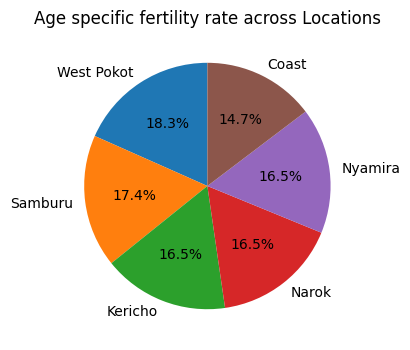

In [ ]:
# Plotting the pie chart for Age specific fertility rate:
plt.figure(figsize=(4, 4))
plt.pie(sd['Age specific fertility rate: 10-14'],
        labels=sd.index,
        autopct='%1.1f%%',  # Display percentage values
        startangle=90)  # Start angle for the first slice
plt.title('Age specific fertility rate across Locations')
plt.show()


2. Which region has the highest child survival rates?

 Compare neonatal mortality and under-five mortality across regions.

  Are high neonatal mortality rates linked to lower vaccination coverage?

In [ ]:
# neonatal mortality and under-five mortality across regions
sdgm=df[df['Indicator'].isin([
    "Neonatal mortality rate",
    "Under-five mortality rate"
])]


#slice on levelrank
sdgm=sdgm[sdgm['LevelRank']>=0]

#pivot table
sdgm=sdgm.pivot_table(index='Location',columns='Indicator',values='Value')
sdgm.sort_values(by='Under-five mortality rate', ascending=False)

sdgm.head()

Indicator,Neonatal mortality rate,Under-five mortality rate
Location,,
Baringo,28.5,47.5
Bomet,22.5,39.0
Bungoma,23.5,56.0
Busia,22.5,65.5
Central,22.5,44.5


In [ ]:
# Vaccination coverage
sdgv=df[df['Indicator'].isin([
    "Pneumococcal 3 vaccination received",
    "DPT 3 vaccination received"
])]


#slice on levelrank
sdgv=sdgv[sdgv['LevelRank']>=0]

#pivot table
sdgv=sdgv.pivot_table(index='Location',columns='Indicator',values='Value')
sdgv.sort_values(by='DPT 3 vaccination received', ascending=False)

sdgv.head()


Indicator,DPT 3 vaccination received,Pneumococcal 3 vaccination received
Location,,
Baringo,95.350000,95.1
Bomet,93.900000,95.4
Bungoma,93.100000,100.0
Busia,93.450000,92.5
Central,87.716667,NaN


In [ ]:
sdgv.plot(kind='line',ylabel='Location', xlabel='frequency(%)',title='VACCINATION COVERAGE',  figsize=(4, 4), color='skyblue' )

In [ ]:
#(sdgm, containing neonatal and under-five mortality rates, and sdgv, containing vaccination coverage data) and combines them based on the common 'Location' column using an inner join.
merged = pd.merge(sdgm, sdgv, on=['Location'],how='inner')
merged.head()

Indicator,Neonatal mortality rate,Under-five mortality rate,DPT 3 vaccination received,Pneumococcal 3 vaccination received
Location,,,,
Baringo,28.5,47.5,95.350000,95.1
Bomet,22.5,39.0,93.900000,95.4
Bungoma,23.5,56.0,93.100000,100.0
Busia,22.5,65.5,93.450000,92.5
Central,22.5,44.5,87.716667,NaN


In [ ]:
merged.corr().T

Indicator,Neonatal mortality rate,Under-five mortality rate,DPT 3 vaccination received,Pneumococcal 3 vaccination received
Indicator,,,,
Neonatal mortality rate,1.000000,0.572173,-0.116538,0.040981
Under-five mortality rate,0.572173,1.000000,-0.293384,0.147714
DPT 3 vaccination received,-0.116538,-0.293384,1.000000,0.867661
Pneumococcal 3 vaccination received,0.040981,0.147714,0.867661,1.000000


<Axes: title={'center': 'MORTALITY RATE'}>

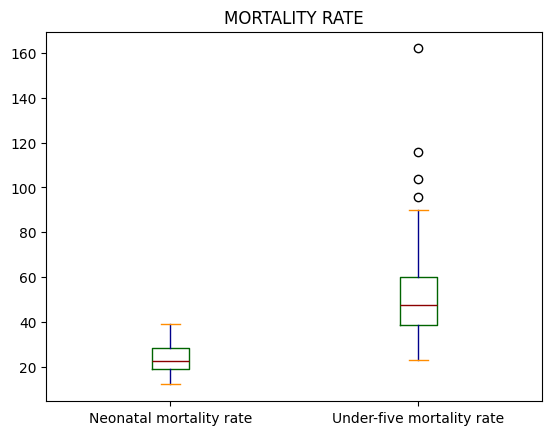

In [ ]:
# boxplot

sdgm.plot(kind='box',
          title='MORTALITY RATE',
          boxprops={'color': 'DarkGreen'},  # Customize box color to DarkGreen
          whiskerprops={'color': 'DarkBlue'},  # Customize whisker color to DarkBlue
          medianprops={'color': 'DarkRed'},  # Customize median color to DarkRed
          capprops={'color': 'DarkOrange'}  # Customize cap color to DarkOrange
)

#SECTION 2: Family Planning s Gender Equality – Who Has Control?

#Background:
Gender equality is critical for sustainable development. This section explores how
women's access to healthcare and, decision-making
Research Questions:
5. Who decides? Women’s autonomy in decision-making

What percentage of women make their own decisions regarding healthcare,
major purchases, and visiting family?
 Are certain regions more restrictive than others?
6. Family planning: Are modern methods available to all?
 What percentage of women have their demand for family planning satisfied
by modern methods?
 Is there a difference between married and unmarried women?

5. Who decides? Women’s autonomy in decision-making


What percentage of women make their own decisions regarding healthcare, major purchases, and visiting family?

Are certain regions more restrictive than others?

In [ ]:
# women make their own decisions regarding healthcare, major purchases, and visiting family
sdgd=df[df['Indicator'].isin([
    "Own decision making about all three decisions"
])]


#slice on levelrank
sdgd=sdgd[sdgd['LevelRank']>=0]

#pivot table
sdgd=sdgd.pivot_table(index='Location',columns='Indicator',values='Value')
sdgd= sdgd.sort_values(by='Own decision making about all three decisions', ascending=False)

# Select the last three rows from the sorted DataFrame 'sdgd' and assign them to a new DataFrame called 'sdgd_tail_6'.
# These rows represent the s locations with the lowest percentage of women making their own decisions.
sdgd_tail_6 = sdgd.tail(3)

sdgd_tail_6.tail()


Indicator,Own decision making about all three decisions
Location,
West Pokot,34.7
Garissa,14.8
Mandera,13.3


<Axes: title={'center': 'LAST THREE'}, xlabel='Location', ylabel='frequency(%)'>

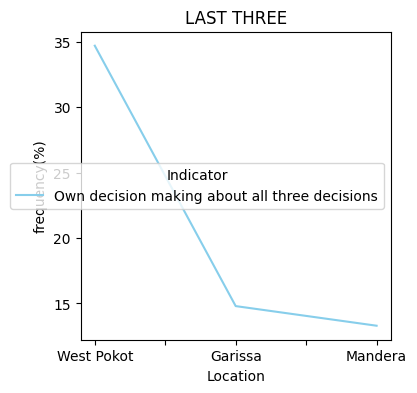

In [ ]:
# This line creates a line plot using the data in the 'sdgd_tail_6' DataFrame
sdgd_tail_6.plot(kind='line',ylabel='frequency(%)', xlabel='Location',title='LAST THREE',  figsize=(4, 4), color='skyblue' )

<Axes: title={'center': 'SELF DECISON MAKING'}, xlabel='frequency(%)', ylabel='Location'>

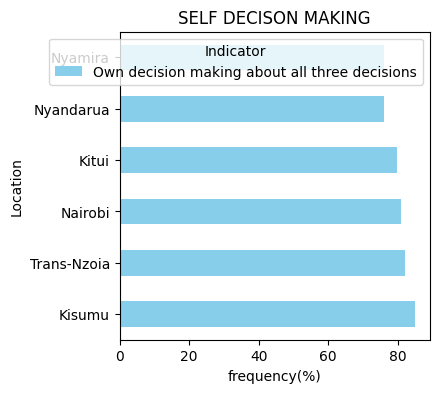

In [ ]:
# Sort the DataFrame 'sdgd' based on the 'Own decision making about all three decisions' column in descending order.
# This means the locations with the highest percentage of women making their own decisions will be at the top.
sdgd = sdgd.sort_values(by='Own decision making about all three decisions', ascending=False)

# Select the top 6 rows from the sorted DataFrame 'sdgd' and assign them to a new DataFrame called 'sdgd_top6'.
# These rows represent the 6 locations with the highest percentage of women making their own decisions.
sdgd_top6 = sdgd.head(6)

# Create a horizontal bar plot using the 'sdgd_top6' DataFrame
sdgd_top6.plot(kind='barh',ylabel='Location', xlabel='frequency(%)',title='SELF DECISON MAKING',  figsize=(4, 4), color='skyblue' )

6. Family planning: Are modern methods available to all?

What percentage of women have their demand for family planning satisfied by modern methods?

Is there a difference between married and unmarried women?

In [ ]:
#  women have their demand for family planning satisfied by modern methods
sdg=df[df['Indicator'].isin([
    "Demand for family planning satisfied by modern methods (all women)",
    "Demand for family planning satisfied by modern methods (sexually active unmarried women)"

])]


#slice on levelrank
sdg=sdg[sdg['LevelRank']>=0]

#pivot table
sdg=sdg.pivot_table(index='Location',columns='Indicator',values='Value')

#Calculating the value of married women by finding the difference between all women and unmarried women value
sdg['Married women']=abs(sdg.iloc[:,0] - sdg.iloc[:,1])

#sort value
sdg=sdg.sort_values(by='Demand for family planning satisfied by modern methods (sexually active unmarried women)',ascending=False)
sdg.head()


Indicator,Demand for family planning satisfied by modern methods (all women),Demand for family planning satisfied by modern methods (sexually active unmarried women),Married women
Location,,,
Kirinyaga,80.900000,74.400000,6.500000
Kilifi,68.300000,73.500000,5.200000
Nairobi,70.142857,66.114286,4.028571
Murang'a,81.200000,66.100000,15.100000
Central,71.460000,62.800000,8.660000


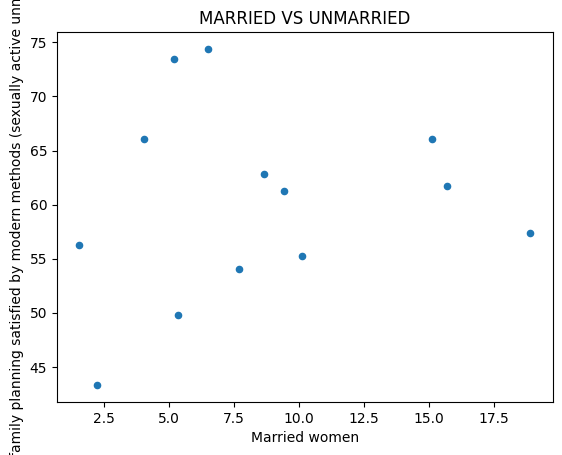

In [ ]:

#scatter plot:
sdg.plot(kind='scatter', x='Married women', y='Demand for family planning satisfied by modern methods (sexually active unmarried women)', title='MARRIED VS UNMARRIED')

plt.show()

#SECTION 3: Sanitation s Infrastructure – Who Has Basic Needs?

#Background:
Access to clean water, electricity, and sanitation is a basic human right, yet many regions
still struggle with these issues.

Research Questions:
10. Who still practices open defecation? Why?

 Identify regions where open defecation is most common.

 Are these regions also lacking in handwashing facilities?

In [ ]:

# Identify regions where open defecation is most common and regions also lacking in handwashing facilities
sdg1 = df[df['Indicator'].isin([
    "Population with a basic handwashing facility, with soap and water available",
    "Population using open defecation"

])]


# Slice on levelrank
sdg1 = sdg1[sdg1['LevelRank'] >= 0]

# Pivot table
sdg1 = sdg1.pivot_table(index='Location', columns='Indicator', values='Value')

#calculating the value of regions lacking handwashing facilities
sdg1['lacking handwashing facilities']=abs(sdg1.iloc[:,0] - sdg1.iloc[:,1])


# Sort by open defecation rate to find regions with the highest rates
sdg1_top = sdg1.sort_values(by='Population using open defecation', ascending=False,  inplace=True)
sdg1_top=sdg1.head(4)
sdg1_top


Indicator,Population using open defecation,"Population with a basic handwashing facility, with soap and water available",lacking handwashing facilities
Location,,,
Turkana,70.800000,16.4,54.400000
North Eastern,63.966667,9.9,54.066667
Tana River,55.200000,7.3,47.900000
Samburu,52.600000,19.2,33.400000


In [ ]:
sdg1_top.corr()

<Axes: title={'center': 'Population using open defecation'}, xlabel='Location', ylabel='frequency(%)'>

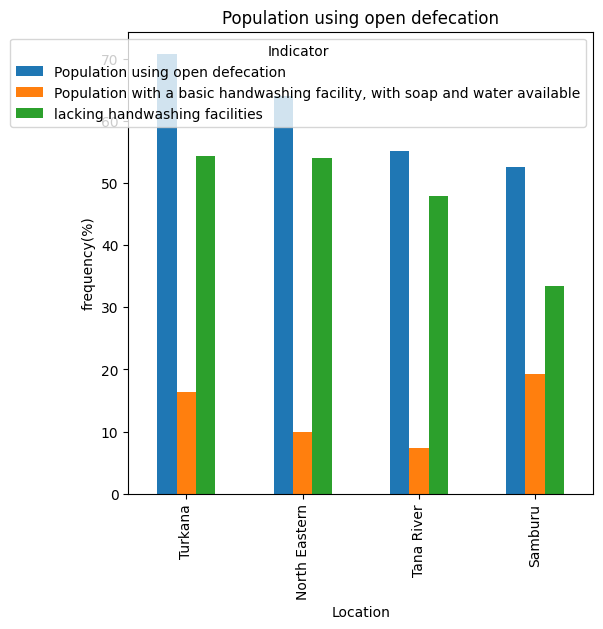

In [ ]:


sdg1_top.plot(kind='bar',ylabel='frequency(%)', xlabel='Location', title='Population using open defecation', figsize=(6, 6) )